# CSCI 3352 Biological Networks, Spring 2022, Prof. Clauset
Submit here: https://canvas.colorado.edu/courses/80370

# Problem Set 1 : Fundamentals of Networks

***

**Name**: Giuliano Costa

***

This assignment is due on Canvas by **11:55pm on Friday, January 21**. Your solutions to non-programming questions should be done in Markdown directly below the associated question. Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own** (see syllabus for detailed guidance). There are 88 points total, and 15 pts extra credit.

**NOTES**: 

- Unless a url is given for a data set, you will find the required data on the course Canvas.
- If you're not familiar with typesetting math directly in Markdown, you may do your work on paper first and then typeset it later. This [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) provides helpful guidance for writing math in Markdown. 
- It is **unhelpful** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.

***
* [Documentation for networkx](https://networkx.github.io/documentation/stable/)
* [Tutorial for networkx](https://networkx.github.io/documentation/stable/tutorial.html)

[//]: <> (Documentation for igraph Python https://igraph.org/python/ )

In [2]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline

***
## Problem 1 : Network warmup (33 pts total)

This problem gives you with practice performing basic operations on network data, using the `networkx` library. In order to answer these questions, you will need to search through the `networkx` online documentation to find appropriate functions. Some solutions will require you to write a little bit of your own code to process the input or output of those functions.

***
### Problem 1-A (5 pts)

Using `networkx`, load the assigned network data file as a simple graph, and then report the following:
* number of nodes $n$
* number of edges $m$
* mean degree $\langle k \rangle$

There are 3 network files provided. Enter your birthday in the format MMYY (drop a leading 0) as `seed` and then work with the file the code snippet below tells you is yours.

In [3]:
import random
seed = 499

##### do not modify below here #####
random.seed(seed)
roll_the_dice = random.randint(1, 3)
if roll_the_dice == 1:
    print(f'Lucky you! Your file is karate.gml')
elif roll_the_dice == 2:
    print(f'Fantastic! Your file is grass_web.gml')
else:
    print(f'Exciting! Your file is yeast_spliceosome.gml')
##### do not modify above here #####

Lucky you! Your file is karate.gml


In [16]:

karate = nx.read_gml("karate.gml", label="id")
n = len(karate.nodes)
m = len(karate.edges)
k=0
for i in range(1, n):
    k += karate.degree[i]
kmean = k / n


##### do not modify below here #####
print(f'number of nodes, n  = {n}')
print(f'number of edges, m  = {m}')
print(f'mean degree,    <k> = %5.2f' % kmean)

number of nodes, n  = 34
number of edges, m  = 78
mean degree,    <k> =  4.09


***
### Problem 1-B (6 pts)

Use the drawing functions in `networkx` to visualize your network in 3 ways:
* `spring` layout
* `circular` layout
* `random` layout

Use the function `plt.show()` to show the layout itself, once you've built it using `networkx`.

Then, write a few sentences comparing the layouts. Briefly explain what, if anything, does each show well or not well.

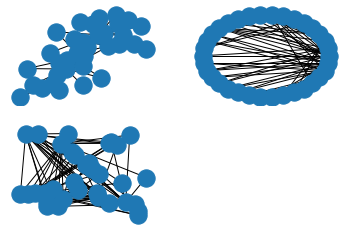

In [32]:
# Your code here

G = nx.karate_club_graph()
plt.subplot(2,2,1)
nx.draw_spring(G)
plt.subplot(2,2,2)
nx.draw_circular(G)
plt.subplot(2,2,3)

nx.draw_random(G)


* The **spring layout** ... (your discussion here)
* The **random layout** ... (your discussion here)
* The **circular layout** ... (your discussion here)

***
### Problem 1-C (14 pts)

Using `networkx` functions, and any additional code you need to write, calculate and report the following network summary statistics:
* diameter $\ell_\max$
* mean geodesic path length $\langle \ell \rangle$
* clustering coefficient $C$ (aka, transitivity)
* number of connected components $h$
* maximum degree $k_{\rm max}$
* standard deviation of the degrees $\sigma_{k}$

Hint: the first four of these can be calculated using built-in functions from `networkx`; for the last two, you'll need to use the `.degrees(G)` function to obtain a dictionary of the degrees, and the process it yourself.

In [34]:
diameter = nx.diameter(G) #max eccentricty from 1 node to furthest.

#Average shortest path
ellmean = nx.average_shortest_path_length(G) 

#How clustered nodes are
C = nx.transitivity(G)

#Calculates all connected components
h = nx.number_connected_components(G)

#creates a list of every degree for all nodes in our network, gw_network.degree() returns the node and the degree of 
#said node, I take just the degree and append it to a list
all_degrees = [d for (n, d) in G.degree()]
kmax = max(all_degrees)

#Uses our already created list of degrees for each node and uses numerical
#python to calculate the standard deviation
kstd = np.std(all_degrees)



##### do not modify below here #####
print(f'diameter = {diameter}')
print(f'mean geodesic distance, <ell> = %5.2f' % ellmean)
print(f'clustering coefficient, C     = %5.2f' % C)
print(f'number of components,   h     =  {h}')
print(f'max degree, k_max = {kmax}')
print(f'max degree, k_std = %5.2f' % kstd)

diameter = 5
mean geodesic distance, <ell> =  2.41
clustering coefficient, C     =  0.26
number of components,   h     =  1
max degree, k_max = 17
max degree, k_std =  3.82


***
### Problem 1-D (8 pts)

Using the provided functions, make **four** plots of the degree distribution:
* a `bar` plot of the probability density function (PDF; aka, a simple histogram), showing $\Pr(k)$ vs. $k$
* a `semilogx` plot of the PDF, showing $\Pr(k)$ vs. $\log_{10} k$
* a `loglog` plot of the PDF, showing $\log_{10} \Pr(k)$ vs. $\log_{10} k$
* a `loglog` plot of the complementary cumulative distribution function (CCDF), showing $\log_{10} \Pr(K\geq k)$ vs. $\log_{10} k$

Then comment briefly on the aspects of the degree distribution's shape that each plot over- or under-emphasizes, or shows clearly.

In [ ]:
def plot_PDFhist(kis):
    # input : a list of degrees, e.g., from a networkx graph G
    # output: a plot of the PDF of the degree distribution Pr(k) as a simple histogram for k>=1
    
    kmax = max(kis)

    # histogram and plot
    counts, bins = np.histogram(kis, bins=[i for i in range(kmax+2)], density=True)
    plt.bar(bins[1:-1], counts[1:], facecolor='r', alpha=0.5)    
    plt.xlabel('Degree, k')
    plt.ylabel('Pr(k)')
    plt.show()
    return

def plot_PDFsemi(kis):
    # input : a list of degrees, e.g., from a networkx graph G
    # output: a plot of the PDF of the degree distribution Pr(k) on semi-log axes for k>=1
    
    kmax = max(kis)

    # histogram and plot
    counts, bins = np.histogram(kis, bins=[i for i in range(kmax+2)], density=True)
    plt.semilogx(bins[1:-1], counts[1:], 'rs-', alpha=0.5)
    plt.xlabel('Degree, k')
    plt.ylabel('Pr(k)')
    plt.show()
    return

def plot_PDFloglog(kis):
    # input : a list of degrees, e.g., from a networkx graph G
    # output: a plot of the PDF of the degree distribution Pr(k) on log-log axes for k>=1
    
    kmax = max(kis)

    # histogram and plot
    counts, bins = np.histogram(kis, bins=[i for i in range(kmax+2)], density=True)
    plt.loglog(bins[1:-1], counts[1:], 'rs', alpha=0.5)
    plt.xlabel('Degree, k')
    plt.ylabel('Pr(k)')
    plt.show()
    return

def plot_CCDF(kis):
    # input : a list of degrees, e.g., from a networkx graph G
    # output: a plot of the CCDF of the degree distribution Pr(K>=k) for k>=1
    
    kmax = max(kis)

    # histogram and plot
    counts, bins = np.histogram(kis, bins=[i for i in range(kmax+2)], density=True)
    cumcounts = np.cumsum(counts)
    cumcounts = np.insert(cumcounts,0,0)
    plt.loglog(bins[1:-1], 1-cumcounts[1:-1], 'rs', alpha=0.5)
    plt.xlabel('Degree, k')
    plt.ylabel('Pr(K>=k)')
    plt.show()
    return

In [ ]:
# Your code here

Your discussion here

***
***
## Problem 2 : Graph properties (30 pts total)

Read each of the following written descriptions of a network data set. Then list in Markdown all applicable _graph properties_ that network has, from the following list.
* directed or undirected
* weighted or unweighted or signed
* bipartite
* temporal
* multiplex
* multigraph
* metadata

***
### Problem 2-A (5 pts)
A network of genes and the $k$-mers they contain, for some fixed choice of $k$ (e.g., $k=3$). Nodes are either the DNA sequence of a full gene or the sequence of a particular $k$-mer, and each gene is connected to all the $k$-mers it contains.

**Answer**:  Undirected

***
### Problem 2-B (5 pts)
A network of proteins and their pairwise interactions. Each node is a protein, and a pair of nodes $i,j$ are connected if protein $i$ binds to protein $j$ _in vivo_. Edges are annotated with the corresponding (real-valued) binding affinity, and nodes are annotated with their molecular weight.

**Answer**: Directed

***
### Problem 2-C (5 pts)
A sequence of network snapshots representing the spread over time of a communicable disease (e.g., influenza) through a human population. Every snapshot contains the same set of nodes, and the $t$-th snapshot contains all the edges that occurred in the real-time interval of $[t,t+1)$. Nodes are people, and two people $i,j$ are connected in the $t$-th snapshot if $j$ was infected by $i$ within the interval $[t,t+1)$. Nodes are annotated by the person's age and sex.

**Answer**: 

***
### Problem 2-D (5 pts)
A gene regulatory network where nodes are genes, and an edge exists if gene $i$ regulates gene $j$, in two layers. Edges are annotated as being either an activation (layer 1) or an inhibition (layer 2) type of interaction. Genes are annotated by their [Gene Ontology](http://geneontology.org) (GO) functional class label.

**Answer**: 

***
### Problem 2-E (5 pts)
A network of proteins in a signaling pathway. Each node is a protein, and a pair of nodes $i,j$ are connected if $i$ binds to $j$. Edges are annotated with the effect of the binding, either activation or inhibition.

**Answer**: 

***
### Problem 2-F (5 pts)
A network of disease and gene associations, where nodes are either diseases or genes, and a disease $i$ and a gene $j$ are connected if $j$ is associated (in some way) with the incidence of $i$. Disease are annotated with various information about them, e.g., their name, treatment, symptoms list, etc., and genes are annotated with the DNA sequence.

**Answer**: 

***
***

## Problem 3 : Calculations by hand (25 pts total)

For each of the following networks, calculate by hand:
* maximum degree $k_{\rm max}$
* minimum degree $k_{\rm min}$
* clustering coefficient $C$ (transitivity)
* diameter $\ell_\max$

Do not use software to do these calculations. Explain each calculation and show your work in Markdown in the corresponding box below.

Hint: If a specific network is given, you may give your answers as numbers. If a family of networks is given (e.g., one in which the number of nodes $n$ is not specified), your answers should be in terms of the variables that parameterize the network (e.g., $n$).

***
### Problem 3-A (5 pts)
Let $G$ be a fully connected simple network, aka, a complete graph, with $n$ nodes.




Your answer here

***
### Problem 3-B (10 pts)

In [ ]:
G = nx.Graph()          # empty graph data structure
# now, add a bunch of edges simultaneously
G.add_edges_from([(1,2), (1,3), (2,3), (2,4), (3,4), (4,5), (5,6), (5,7), (5,8), (6,7), (7,8)])
nx.draw_networkx(G,with_labels=True,node_size=500,node_color='r',width=2) # default: spring embed, with some options
limits=plt.axis('off')  # turn off the bounding box and axis labels
plt.show()              # show me the network!

Your answer here

***
### Problem 3-C (5 pts)
Let $G$ be a _perfect_ binary tree containing $n$ nodes. Hint: how many nodes $n$ does a perfect binary tree contain, for depth $d=0,1,2,\dots$

(*extra credit*) Calculate the mean degree $\langle k \rangle$.

Your answer here

***
### Problem 3-D (5 pts)
Let $G$ be a simple "ring" network with $n$ nodes, in which nodes are arranged in a line, each one connecting only to its immediate neighbors to the left and right, except for the nodes at the beginning and end of the line, which connect to each other. Below is an example for $n=6$, but state your answers for the general case of $n>0$.

In [ ]:
G = nx.Graph()          # empty graph data structur
G.add_edges_from([(1,2), (2,3), (3,4), (4,5), (5,6), (6,1)])
nx.draw_networkx(G,with_labels=True,node_size=500,node_color='r',width=2) # default: spring embed, with some options
limits=plt.axis('off')  # turn off the bounding box and axis labels
plt.show()              # show me the network!

Your answer here

***
***

## Problem 4 : Reading the literature (*10pts extra credit*)

*This extra credit problem is meant to help you look for a project topic*

Choose a paper from the [Supplemental Reading list on the external course webpage](https://aaronclauset.github.io/courses/3352/). Read the paper (the whole paper, not just the abstract). Think about what it says and what it finds. Read it again, if it's not clear. Then, write 1-3 sentences for each of the following questions in a way that clearly summarizes the work, and its context.
* What was the research question?
* What was the approach the authors took to answer that question?
* What did they do well?
* What could they have done better?
* What extensions can you envision?


Do not copy any text from the paper itself; write your own summary, in your own words in Markdown in the corresponding box below. Be sure to answer each of the five questions. The amount of extra credit will depend on the accuracy and thoughtfulness of your answers.

* *What paper did you choose?*<br/>
Give the Authors, Title, Publication Venue, Year
<br/>


* *What was the research question?*<br/>
Your answer here
<br/>

* *What was the approach the authors took to answer that question?*<br/>
Your answer here
<br/>

* *What did they do well?*<br/>
Your answer here
<br/>

* *What could they have done better?*<br/>
Your answer here
<br/>

* *What extensions can you envision?*<br/>
Your answer here